In [25]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

In [9]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


In [11]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [21]:
print(df.corr().index)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')


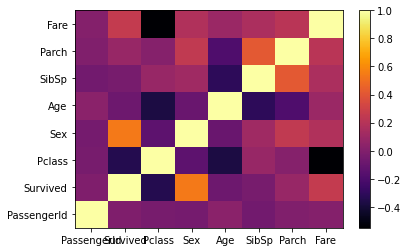

In [23]:
plt.pcolor(df.corr(), cmap=plt.cm.inferno)
plt.xticks(ticks=np.arange(df.corr().shape[1])+0.5, labels=df.corr().index)
plt.yticks(ticks=np.arange(df.corr().shape[0])+0.5, labels=df.corr().columns)
plt.colorbar()
plt.show()

In [24]:
data = df[['Sex', 'Pclass', 'Fare']]
label = df['Survived']

In [27]:
clf = SVC()
scores = cross_val_score(clf, data, label, cv=5)
m_score = np.mean(scores)
m_score

0.6678865105768628

In [30]:
C = [0.01, 0.1, 1, 10, 100]
gamma = [0.01, 0.1, 1, 10, 100]
best_score = 0

for i in C:
    for j in gamma:
        clf = SVC(C=i, gamma=j)
        scores = cross_val_score(clf, data, label, cv=5)
        m_score = np.mean(scores)
        if m_score > best_score:
            best_score = m_score
            best_param = {'C': i, 'gamma': j}

print(f"Best score is {best_score:.3f}")
print(f"Best parameter: {best_param}")

Best score is 0.791
Best parameter: {'C': 100, 'gamma': 1}
